Just to make sure my hacky for loop works, let's compare the calculated diversity statistics on Chromosome 1 in a few ways. 

In [1]:
import egglib
import glob 
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

In [2]:
#chrom1_stats is calculated on the CDS regions using egglib, using 55 samples close-ish to NLRome  
chrom1_stats=pd.read_csv('/global/scratch/users/chandlersutherland/e14/popgen/vcf_1001/chrom1.csv')
chrom1_stats=chrom1_stats[['D', 'Pi', 'gene']]
#gene_results is calculated on gene regions using egglib, using 55 samples close-ish to NLRome  
gene_results=pd.read_csv('/global/scratch/users/chandlersutherland/e14/popgen/vcf_1001/egglib_gene_chrom1.csv')
#grey is mysterious grey table, allegedly from 1001 genomes  
grey=pd.read_csv('/global/scratch/users/chandlersutherland/e14/popgen/Ath_somatic_mutations_gene_level_data.csv')
grey=grey[['gene', 'chr', 'TajimaD']]
#NLRs are egglib calculated on NLRome CDS alignments 
nlrs=pd.read_csv('/global/scratch/users/chandlersutherland/e14/popgen/col0_popgen_stats.tsv', sep='\t')
nlrs=nlrs[['Gene', 'D', 'Pi', 'HV']]
#popgenome is on the same vcf and bed as chrom1_stats and gene_results, just different program. this one is cds with some hacky averaging
popgenome=pd.read_csv('/global/scratch/users/chandlersutherland/e14/popgen/vcf_1001/chrom1_popgenome.csv')
popgenome
#popgenome gene 
popgenome_g=pd.read_csv('/global/scratch/users/chandlersutherland/e14/popgen/vcf_1001/chrom1_popgenome_gene.csv')

#egglib all genome 
egg=pd.read_csv('/global/scratch/users/chandlersutherland/e14/popgen/vcf_1001/cds_egglib_wholegenome.csv')
egg=egg[['D', 'Pi', 'gene']]

In [3]:
piraw_nlr=pd.read_csv('/global/scratch/users/chandlersutherland/e14/popgen/col0_rawegglib_stats.tsv', sep='\t')
piraw_nlr['pi_by_dna'] = piraw_nlr['Pi_raw']/piraw_nlr['dna_aln']
piraw_nlr['pi_by_lseff'] = piraw_nlr['Pi_raw']/piraw_nlr['lseff']
piraw_nlr
piraw_chrom1=pd.read_csv('/global/scratch/users/chandlersutherland/e14/popgen/vcf_1001/chrom1_rawpi.csv')
piraw_chrom1['pi_by_dna']=piraw_chrom1['Pi']/piraw_chrom1['cds_length']
piraw_chrom1['pi_by_lseff']=piraw_chrom1['Pi']/piraw_chrom1['lseff']
piraw_chrom1

piraw_nlr_55=pd.read_csv('/global/scratch/users/chandlersutherland/e14/popgen/vcf_1001/egglib_nlr_55.csv')
piraw_nlr_55['pi_by_dna'] = piraw_nlr_55['Pi_raw']/piraw_nlr_55['dna_aln']
piraw_nlr_55['pi_by_lseff'] = piraw_nlr_55['Pi_raw']/piraw_nlr_55['lseff']
piraw_nlr_55

,Unnamed: 0,D,PiN,PiS,Pi_raw,clade,dna_aln,lseff,pi_by_dna,pi_by_lseff
0,0,-1.223581,0.005271,0.011097,19.666667,Int11629_24_35_L_12,4863.0,2529.0,0.004044,0.007776
1,1,-1.546647,0.000841,0.002184,2.928571,Int8443_258_453_R_8,2568.0,2568.0,0.001140,0.001140
2,2,-0.820480,0.000842,0.000741,2.924242,Int9156_236_297_R_14,3603.0,3570.0,0.000812,0.000819
3,3,0.111948,0.011729,0.021233,23.723077,Int9687_297_427_R_29,3669.0,1365.0,0.006466,0.017380
4,4,0.409459,0.018995,0.040595,60.389238,Int12133_61,3879.0,1362.0,0.015568,0.044339
...,...,...,...,...,...,...,...,...,...,...
189,189,-1.545319,0.025386,0.068863,117.200000,Int9156_236_291_R_7,3594.0,2259.0,0.032610,0.051881
190,190,0.472621,0.010338,0.027722,32.739687,Int10172_376_423_R_43,3378.0,1857.0,0.009692,0.017630
191,191,-1.714897,0.006163,0.007365,33.722222,Int14939_40_64_R_9,2724.0,2547.0,0.012380,0.013240
192,192,1.527964,0.023727,0.041786,88.657471,Int11247_267_434_R_35,5289.0,1974.0,0.016763,0.044913


In [4]:
#egglib all genome pi/dna 
egg_pi=pd.read_csv('/global/scratch/users/chandlersutherland/e14/popgen/vcf_1001/cds_egglib_wholegenome2.csv')
egg_pi
#egg_pi=egg_pi[['D', 'Pi', 'gene']]

egg_pi['Pi_by_lseff'].mean()
egg_pi['Pi_by_dna'].mean()

0.0020308125271787914

In [15]:
print('mean pi by dna nlr:', piraw_nlr['pi_by_dna'].mean())
print('mean pi by lseff nlr:', piraw_nlr['pi_by_lseff'].mean())
print('mean pi by dna chrom1:', piraw_chrom1['pi_by_dna'].mean())
print('mean pi by lseff chrom1:', piraw_chrom1['pi_by_lseff'].mean())

print('previous mean pi codon nlr (lseff normal)', nlrs['Pi'].mean())
print('previous mean pi vcf (lseff normal)', chrom1_stats['Pi'].mean())

print('mean pi by dna nlr 55:', piraw_nlr_55['pi_by_dna'].mean())
print('mean pi by lseff nlr 55:', piraw_nlr_55['pi_by_lseff'].mean())

mean pi by dna nlr: 0.00582413660687814
mean pi by lseff nlr: 0.021922936192356447
mean pi by dna chrom1: 0.002052538634067602
mean pi by lseff chrom1: 0.06806472102917993
previous mean pi codon nlr (lseff normal) 0.026906983860598893
previous mean pi vcf (lseff normal) 0.06761792288907122
mean pi by dna nlr 55: 0.007271368555304655
mean pi by lseff nlr 55: 0.016146231390960098


mean Pi/DNA:  0.0009105050967547556
median Pi/DNA:  0.000607314642577096
hvnlr mean:  0.008838051642823174
nonhvNLR mean:  0.004716984144694246


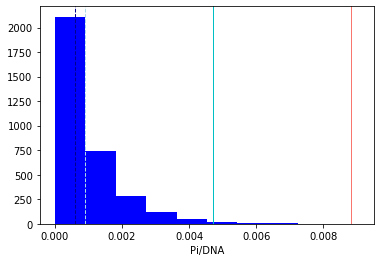

In [15]:
mean=popgenome['pi'].mean()
print('mean Pi/DNA: ', mean)
median=popgenome['pi'].median()
print('median Pi/DNA: ', median)

hvnlr_mean=piraw_nlr[piraw_nlr['HV']=='hv']['pi_by_dna'].mean()
nhvnlr_mean=piraw_nlr[piraw_nlr['HV']=='non-hv']['pi_by_dna'].mean()
print('hvnlr mean: ', hvnlr_mean)
print('nonhvNLR mean: ', nhvnlr_mean)

plt.hist(popgenome['pi'], color='blue')
plt.axvline(mean, color='lightblue', linestyle='dashed', linewidth=1)
plt.axvline(median, color='darkblue', linestyle='dashed', linewidth=1)
plt.axvline(hvnlr_mean, color='#F8766D', linewidth=1)
plt.axvline(nhvnlr_mean, color='#00BFC4', linewidth=1)
plt.xlabel("Pi/DNA")

plt.show()

(0.5225701975696277, 1.8030854697640823e-10)


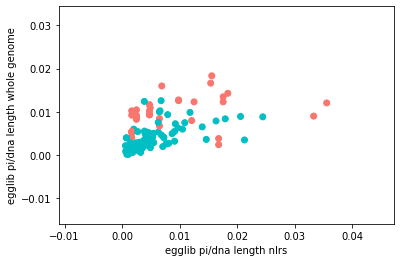

In [9]:
#subsampled piraw nlrs vs whole genome 
#piraw_nlr=piraw_nlr[piraw_nlr['HV']=='non-hv']
test2=pd.merge(piraw_nlr_55, egg_pi, left_on='Gene', right_on='gene').dropna()
test2
# print(test2[['pi_by_dna_x', 'pi_by_dna_y']].corr(method='pearson'))
print(pearsonr(test2['pi_by_dna'], test2['Pi_by_dna']))

colors={'hv':'#F8766D', 'non-hv':'#00BFC4'}
plt.scatter(test2['pi_by_dna'], test2['Pi_by_dna'], c=test2['HV'].map(colors))
plt.xlabel("egglib pi/dna length nlrs")
plt.ylabel("egglib pi/dna length whole genome")
# plt.xlim([-3,3])
# plt.ylim([-3,3])
plt.show()

             pi_by_dna_x  pi_by_dna_y
pi_by_dna_x     1.000000     0.973108
pi_by_dna_y     0.973108     1.000000
(0.9731077515004236, 5.890335702472675e-88)


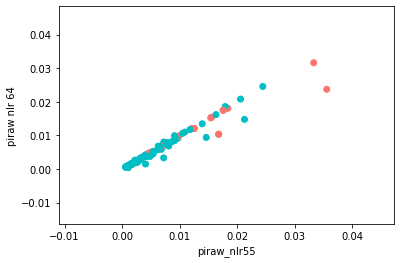

In [22]:
#subsampled piraw nlrs vs whole genome 
#piraw_nlr=piraw_nlr[piraw_nlr['HV']=='non-hv']
test2=pd.merge(piraw_nlr_55, piraw_nlr, left_on='Gene', right_on='Gene').dropna()
test2

print(test2[['pi_by_dna_x', 'pi_by_dna_y']].corr(method='pearson'))
print(pearsonr(test2['pi_by_dna_x'], test2['pi_by_dna_y']))

colors={'hv':'#F8766D', 'non-hv':'#00BFC4'}
plt.scatter(test2['pi_by_dna_x'], test2['pi_by_dna_y'], c=test2['HV_x'].map(colors))
plt.xlabel("piraw_nlr55")
plt.ylabel("piraw nlr 64")
# plt.xlim([-3,3])
# plt.ylim([-3,3])
plt.show()

mean Pi/DNA:  0.0020308125271787914
median Pi/DNA:  0.001274624969324717
hvnlr mean:  0.008838051642823174
nonhvNLR mean:  0.004716984144694246


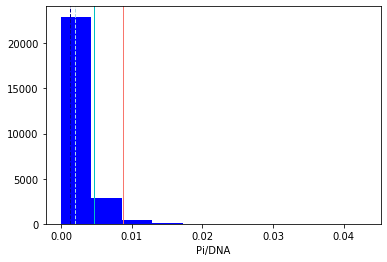

In [9]:
#piraw_chrom1=piraw_chrom1.dropna()

mean=egg_pi['Pi_by_dna'].mean()
print('mean Pi/DNA: ', mean)
median=egg_pi['Pi_by_dna'].median()
print('median Pi/DNA: ', median)

hvnlr_mean=piraw_nlr[piraw_nlr['HV']=='hv']['pi_by_dna'].mean()
nhvnlr_mean=piraw_nlr[piraw_nlr['HV']=='non-hv']['pi_by_dna'].mean()
print('hvnlr mean: ', hvnlr_mean)
print('nonhvNLR mean: ', nhvnlr_mean)

plt.hist(egg_pi['Pi_by_dna'], color='blue')
plt.axvline(mean, color='lightblue', linestyle='dashed', linewidth=1)
plt.axvline(median, color='darkblue', linestyle='dashed', linewidth=1)
plt.axvline(hvnlr_mean, color='#F8766D', linewidth=1)
plt.axvline(nhvnlr_mean, color='#00BFC4', linewidth=1)
plt.xlabel("Pi/DNA")

plt.show()

(0.6443466820215963, 0.0)
0.07310241183440926


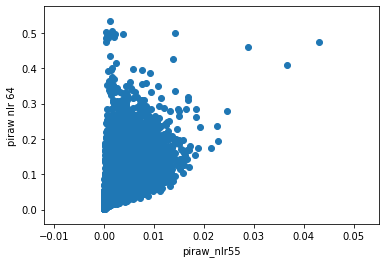

In [12]:
egg_pi.sort_values('Pi_by_lseff', ascending=False).iloc[0:25,]
egg_pi.sort_values('Pi_by_dna', ascending=False).iloc[0:25,]
#plt.hist(egg_pi['lseff'], color='blue')
egg_pi=egg_pi.dropna()
print(pearsonr(egg_pi['Pi_by_dna'], egg_pi['Pi_by_lseff']))
plt.scatter(egg_pi['Pi_by_dna'], egg_pi["Pi_by_lseff"])
#plt.hist(piraw_nlr['lseff'])
#piraw_nlr['lseff'].min()
plt.xlabel("piraw_nlr55")
plt.ylabel("piraw nlr 64")
#egg_pi[egg_pi['lseff'] > 10]
print(egg_pi[egg_pi['lseff'] > 20]['Pi_by_lseff'].mean())

(0.5132057805543866, 2.2906736480232722e-10)


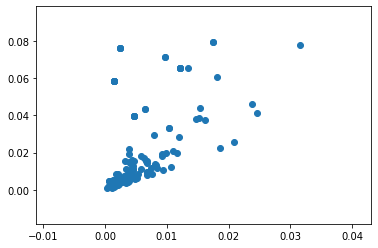

In [9]:
piraw_nlr
print(pearsonr(piraw_nlr['pi_by_dna'], piraw_nlr['pi_by_lseff']))
plt.scatter(piraw_nlr['pi_by_dna'], piraw_nlr['pi_by_lseff'])
# #plt.hist(piraw_nlr['lseff'])
# #piraw_nlr['lseff'].min()
# plt.xlabel("piraw_nlr55")
# plt.ylabel("piraw nlr 64")
# #egg_pi[egg_pi['lseff'] > 10]

mean Pi/lseff:  0.06810687796435816
median Pi/lseff:  0.05456736814424617
hvnlr mean:  0.05458168478275312
nonhvNLR mean:  0.009925844873435227


/global/software/sl-7.x86_64/modules/langs/python/3.7/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/global/software/sl-7.x86_64/modules/langs/python/3.7/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


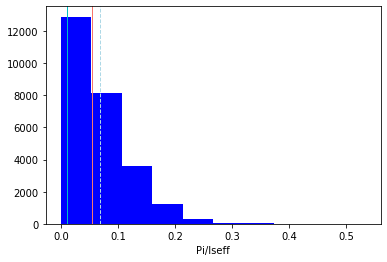

In [26]:
#piraw_chrom1=piraw_chrom1.dropna()

mean=egg_pi['Pi_by_lseff'].mean()
print('mean Pi/lseff: ', mean)
median=egg_pi['Pi_by_lseff'].median()
print('median Pi/lseff: ', median)

hvnlr_mean=piraw_nlr[piraw_nlr['HV']=='hv']['pi_by_lseff'].mean()
nhvnlr_mean=piraw_nlr[piraw_nlr['HV']=='non-hv']['pi_by_lseff'].mean()
print('hvnlr mean: ', hvnlr_mean)
print('nonhvNLR mean: ', nhvnlr_mean)

plt.hist(egg_pi['Pi_by_lseff'], color='blue')
plt.axvline(mean, color='lightblue', linestyle='dashed', linewidth=1)
plt.axvline(median, color='darkblue', linestyle='dashed', linewidth=1)
plt.axvline(hvnlr_mean, color='#F8766D', linewidth=1)
plt.axvline(nhvnlr_mean, color='#00BFC4', linewidth=1)
plt.xlabel("Pi/lseff")

plt.show()

mean popgenome pi:  0.0009105050967547556
median popgenome pi:  0.000607314642577096


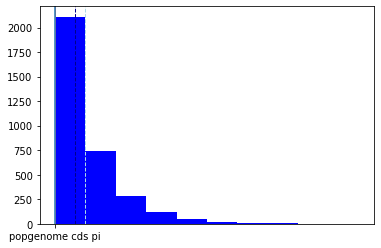

In [29]:
#piraw_chrom1=piraw_chrom1.dropna()
popgenome
mean=popgenome['pi'].mean()
print('mean popgenome pi: ', mean)
median=popgenome['pi'].median()
print('median popgenome pi: ', median)

plt.hist(popgenome['pi'], color='blue')
plt.axvline(mean, color='lightblue', linestyle='dashed', linewidth=1)
plt.axvline(median, color='darkblue', linestyle='dashed', linewidth=1)
#plt.axvline("popgenome cds pi", color='#F8766D', linewidth=1)
plt.axvline()


plt.show()

               pi_by_lseff_x  pi_by_lseff_y
pi_by_lseff_x       1.000000       0.292611
pi_by_lseff_y       0.292611       1.000000
(0.29261147426819056, 0.06690844060913154)


Text(0, 0.5, 'egglib pi/lseff chrom 1')

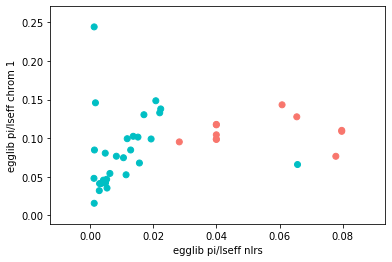

In [31]:
#nlrs vs chrom1_stats 
#piraw_nlr=piraw_nlr[piraw_nlr['HV']=='non-hv']
test2=pd.merge(piraw_nlr, piraw_chrom1, left_on='Gene', right_on='gene').dropna()
test2
print(test2[['pi_by_lseff_x', 'pi_by_lseff_y']].corr(method='pearson'))
print(pearsonr(test2['pi_by_lseff_x'], test2['pi_by_lseff_y']))

colors={'hv':'#F8766D', 'non-hv':'#00BFC4'}
plt.scatter(test2['pi_by_lseff_x'], test2['pi_by_lseff_y'], c=test2['HV'].map(colors))
plt.xlabel("egglib pi/lseff nlrs")
plt.ylabel("egglib pi/lseff chrom 1")

In [7]:
popgenome['d'].mean()
print(popgenome['pi'].mean())
print(popgenome['pi'].median())
popgenome
#chrom1_stats

0.0009105050967547556
0.000607314642577096


,gene,pi,d
0,AT1G01010,0.000319,-0.909053
1,AT1G01020,0.000144,-0.776760
2,AT1G01030,0.000447,1.016493
3,AT1G01040,0.000300,-0.995817
4,AT1G01050,0.000000,NaN
...,...,...,...
3338,AT1G75210,0.000836,-0.077492
3339,AT1G76180,0.000000,NaN
3340,AT1G78870,0.001916,1.147096
3341,AT1G79730,0.000555,-0.650871


                D   TajimaD
D        1.000000  0.633933
TajimaD  0.633933  1.000000
(0.633932830023448, 0.0)


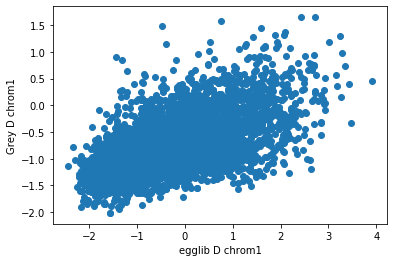

In [3]:
#grey vs chrom1_stats 
test1=pd.merge(chrom1_stats, grey).drop(['Pi', 'gene', 'chr'], axis=1).dropna()
t1=test1.corr(method='pearson')
print(t1)
print(pearsonr(test1['D'], test1['TajimaD']))

plt.scatter(test1['D'], test1['TajimaD'])
plt.xlabel("egglib D chrom1")
plt.ylabel("Grey D chrom1")
plt.show()

          D_x       D_y
D_x  1.000000  0.622165
D_y  0.622165  1.000000
(0.622164655483018, 1.8197972215420497e-05)


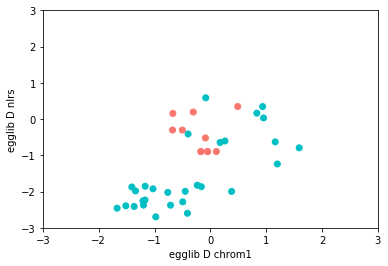

In [4]:
#nlrs vs chrom1_stats 
test2=pd.merge(chrom1_stats, nlrs, left_on='gene', right_on='Gene').dropna()
print(test2[['D_x', 'D_y']].corr(method='pearson'))
print(pearsonr(test2['D_x'], test2['D_y']))

colors={'hv':'#F8766D', 'non-hv':'#00BFC4'}
plt.scatter(test2['D_x'], test2['D_y'], c=test2['HV'].map(colors))
plt.xlabel("egglib D chrom1")
plt.ylabel("egglib D nlrs")
plt.xlim([-3,3])
plt.ylim([-3,3])
plt.show()

(0.1953775004058647, 0.2269788863815343)


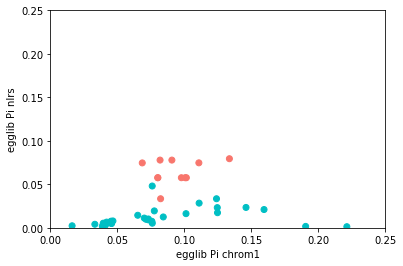

In [5]:
test2[['Pi_x', 'Pi_y']].corr(method='pearson')
print(pearsonr(test2['Pi_x'], test2['Pi_y']))
plt.scatter(test2['Pi_x'], test2['Pi_y'], c=test2['HV'].map(colors))
plt.xlabel("egglib Pi chrom1")
plt.ylabel("egglib Pi nlrs")
plt.xlim([0, 0.25])
plt.ylim([0, 0.25])
plt.show()

          TajimaD         D
TajimaD  1.000000  0.560258
D        0.560258  1.000000
(0.5602575922600677, 3.450642890381919e-12)


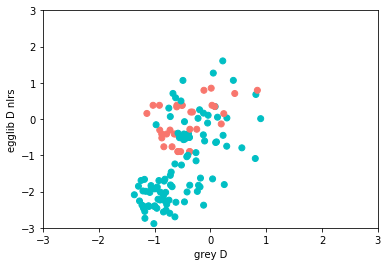

In [6]:
#grey vs nlrs 
test3=pd.merge(grey, nlrs, left_on='gene', right_on='Gene').dropna()
test3[['TajimaD', 'D']].corr(method='pearson')

test3
print(test3[['TajimaD', 'D']].corr(method='pearson'))
print(pearsonr(test3['TajimaD'], test3['D']))

colors={'hv':'#F8766D', 'non-hv':'#00BFC4'}
plt.scatter(test3['TajimaD'], test3['D'], c=test3['HV'].map(colors))
plt.xlabel("grey D")
plt.ylabel("egglib D nlrs")
plt.xlim([-3,3])
plt.ylim([-3,3])
plt.show()

          D         d
D  1.000000  0.610091
d  0.610091  1.000000
(0.6100906969724424, 2.0061079653441584e-236)


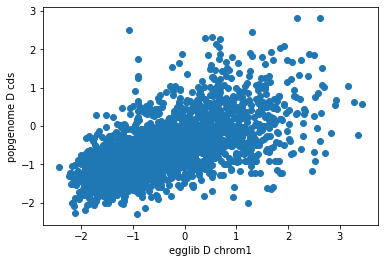

In [7]:
#chrom1_stats vs popgenome  
test4=pd.merge(chrom1_stats, popgenome).dropna()
test4
print(test4[['D', 'd']].corr(method='pearson'))
print(pearsonr(test4['D'], test4['d']))

plt.scatter(test4['D'], test4['d'])
plt.xlabel("egglib D chrom1")
plt.ylabel("popgenome D cds")
#plt.xlim([-3,3])
#plt.ylim([-3,3])
plt.show()

          Pi        pi
Pi  1.000000  0.317768
pi  0.317768  1.000000
(0.3177678345700061, 1.5229598312938887e-55)


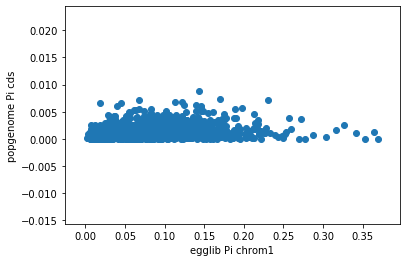

In [8]:
#chrom1_stats vs popgenome  
test4=pd.merge(chrom1_stats, popgenome).dropna()
test4
print(test4[['Pi', 'pi']].corr(method='pearson'))
print(pearsonr(test4['Pi'], test4['pi']))

plt.scatter(test4['Pi'], test4['pi'])
plt.xlabel("egglib Pi chrom1")
plt.ylabel("popgenome Pi cds")
#plt.xlim([-3,3])
#plt.ylim([-3,3])
plt.show()

          TajimaD         d
TajimaD  1.000000  0.464754
d        0.464754  1.000000
(0.46475368063161115, 3.2668819030173555e-148)


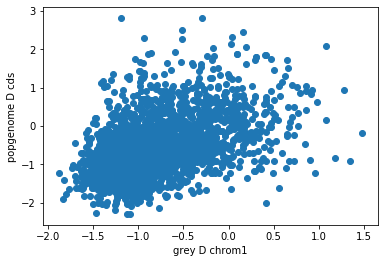

In [9]:
#popgenome vs grey  
test5=pd.merge(grey, popgenome).dropna()
test5
print(test5[['TajimaD', 'd']].corr(method='pearson'))
print(pearsonr(test5['TajimaD'], test5['d']))

plt.scatter(test5['TajimaD'], test5['d'])
plt.xlabel("grey D chrom1")
plt.ylabel("popgenome D cds")
#plt.xlim([-3,3])
#plt.ylim([-3,3])
plt.show()

          D_x       D_y
D_x  1.000000  0.774138
D_y  0.774138  1.000000
(0.7741384111570382, 0.0)


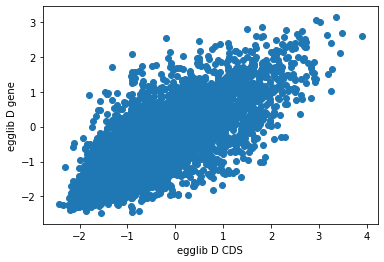

In [10]:
#chrom1_stats (cds) vs gene level stats  
test6=pd.merge(chrom1_stats, gene_results, left_on='gene', right_on='name').dropna()
test6
print(test6[['D_x', 'D_y']].corr(method='pearson'))
print(pearsonr(test6['D_x'], test6['D_y']))

plt.scatter(test6['D_x'], test6['D_y'])
plt.xlabel("egglib D CDS")
plt.ylabel("egglib D gene")
#plt.xlim([-3,3])
#plt.ylim([-3,3])
plt.show()

          TajimaD         D
TajimaD  1.000000  0.725148
D        0.725148  1.000000
(0.7251481740642355, 0.0)


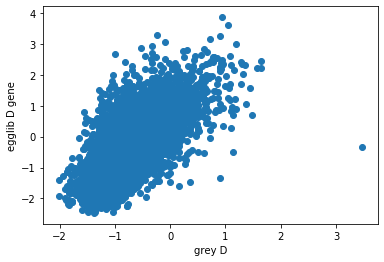

In [11]:
#grey vs gene level stats  
test7=pd.merge(grey, gene_results, left_on='gene', right_on='name').dropna()
test7
print(test7[['TajimaD', 'D']].corr(method='pearson'))
print(pearsonr(test7['TajimaD'], test7['D']))

plt.scatter(test7['TajimaD'], test7['D'])
plt.xlabel("grey D")
plt.ylabel("egglib D gene")
#plt.xlim([-3,3])
#plt.ylim([-3,3])
plt.show()

           tajd_gene         D
tajd_gene   1.000000  0.725923
D           0.725923  1.000000
(0.725922950144989, 0.0)


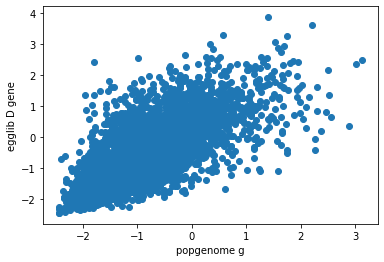

In [17]:
#popgenome gene vs egglib gene 
test8=pd.merge(popgenome_g, gene_results, left_on='gene', right_on='name').dropna()
test8
print(test8[['tajd_gene', 'D']].corr(method='pearson'))
print(pearsonr(test8['tajd_gene'], test8['D']))

plt.scatter(test8['tajd_gene'], test8['D'])
plt.xlabel("popgenome g")
plt.ylabel("egglib D gene")
#plt.xlim([-3,3])
#plt.ylim([-3,3])
plt.show()

          d         D
d  1.000000  0.348412
D  0.348412  1.000000
(0.34841187796851425, 0.35815689362187114)


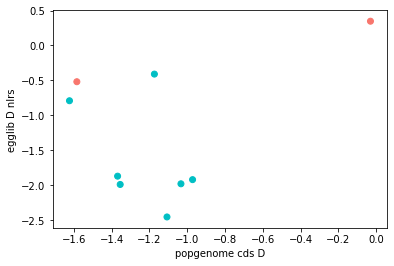

In [6]:
#popgenome gene vs nlr gene
test13=pd.merge(popgenome, nlrs, left_on='gene', right_on='Gene').dropna()
test13
print(test13[['d', 'D']].corr(method='pearson'))
print(pearsonr(test13['d'], test13['D']))

colors={'hv':'#F8766D', 'non-hv':'#00BFC4'}
plt.scatter(test13['d'], test13['D'], c=test13['HV'].map(colors))
plt.xlabel("popgenome cds D")
plt.ylabel("egglib D nlrs")
#plt.xlim([-3,3])
#plt.ylim([-3,3])
plt.show()

           tajd_gene   TajimaD
tajd_gene   1.000000  0.539112
TajimaD     0.539112  1.000000
(0.539111510573749, 4.508083285337e-311)


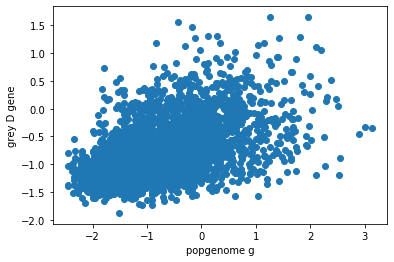

In [20]:
#popgenome gene vs grey gene
test9=pd.merge(popgenome_g, grey).dropna()
test9
print(test9[['tajd_gene', 'TajimaD']].corr(method='pearson'))
print(pearsonr(test9['tajd_gene'], test9['TajimaD']))

plt.scatter(test9['tajd_gene'], test9['TajimaD'])
plt.xlabel("popgenome g")
plt.ylabel("grey D gene")
#plt.xlim([-3,3])
#plt.ylim([-3,3])
plt.show()

(0.639869968553731, 0.0)


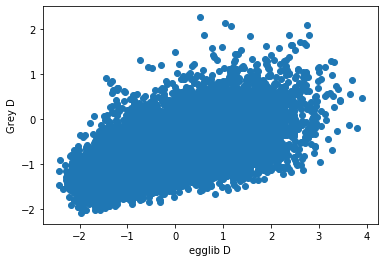

In [9]:
#egg CDS vs Grey  
test10=pd.merge(egg, grey).dropna()
test10
print(pearsonr(test10['D'], test10['TajimaD']))


plt.scatter(test10['D'], test10['TajimaD'])
plt.xlabel("egglib D")
plt.ylabel("Grey D")
plt.show()

(0.6437724737544085, 8.47583276167195e-15)


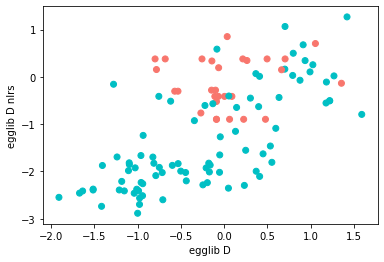

In [12]:
#nlrs vs egg
test11=pd.merge(egg, nlrs, left_on='gene', right_on='Gene').dropna()
test11
# print(test2[['D_x', 'D_y']].corr(method='pearson'))
print(pearsonr(test11['D_x'], test11['D_y']))

colors={'hv':'#F8766D', 'non-hv':'#00BFC4'}
plt.scatter(test11['D_x'], test11['D_y'], c=test11['HV'].map(colors))
plt.xlabel("egglib D")
plt.ylabel("egglib D nlrs")
#plt.xlim([-3,3])
#plt.ylim([-3,3])
plt.show()

(0.10259658292847598, 0.2752338635835519)


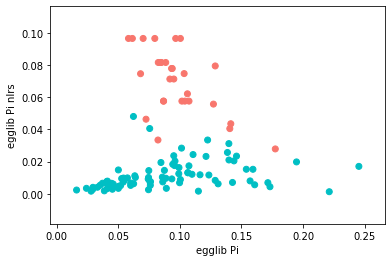

In [13]:
print(pearsonr(test11['Pi_x'], test11['Pi_y']))

colors={'hv':'#F8766D', 'non-hv':'#00BFC4'}
plt.scatter(test11['Pi_x'], test11['Pi_y'], c=test11['HV'].map(colors))
plt.xlabel("egglib Pi")
plt.ylabel("egglib Pi nlrs")
#plt.xlim([-3,3])
#plt.ylim([-3,3])
plt.show()